# 目的の確認
- 使うデータセット: breast_cancer
- 569個の腫瘍データの特徴からその腫瘍が悪性なのか、良性なのか予測する

# EDA

In [21]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

In [40]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=[element for element in cancer.feature_names])

# 腫瘍の悪性、良性のカラムをデータフレームに追加
df['tumor'] = cancer.target

In [53]:
# データの確認
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [54]:
# 欠損値の確認
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
tumor                      0
dtype: int64

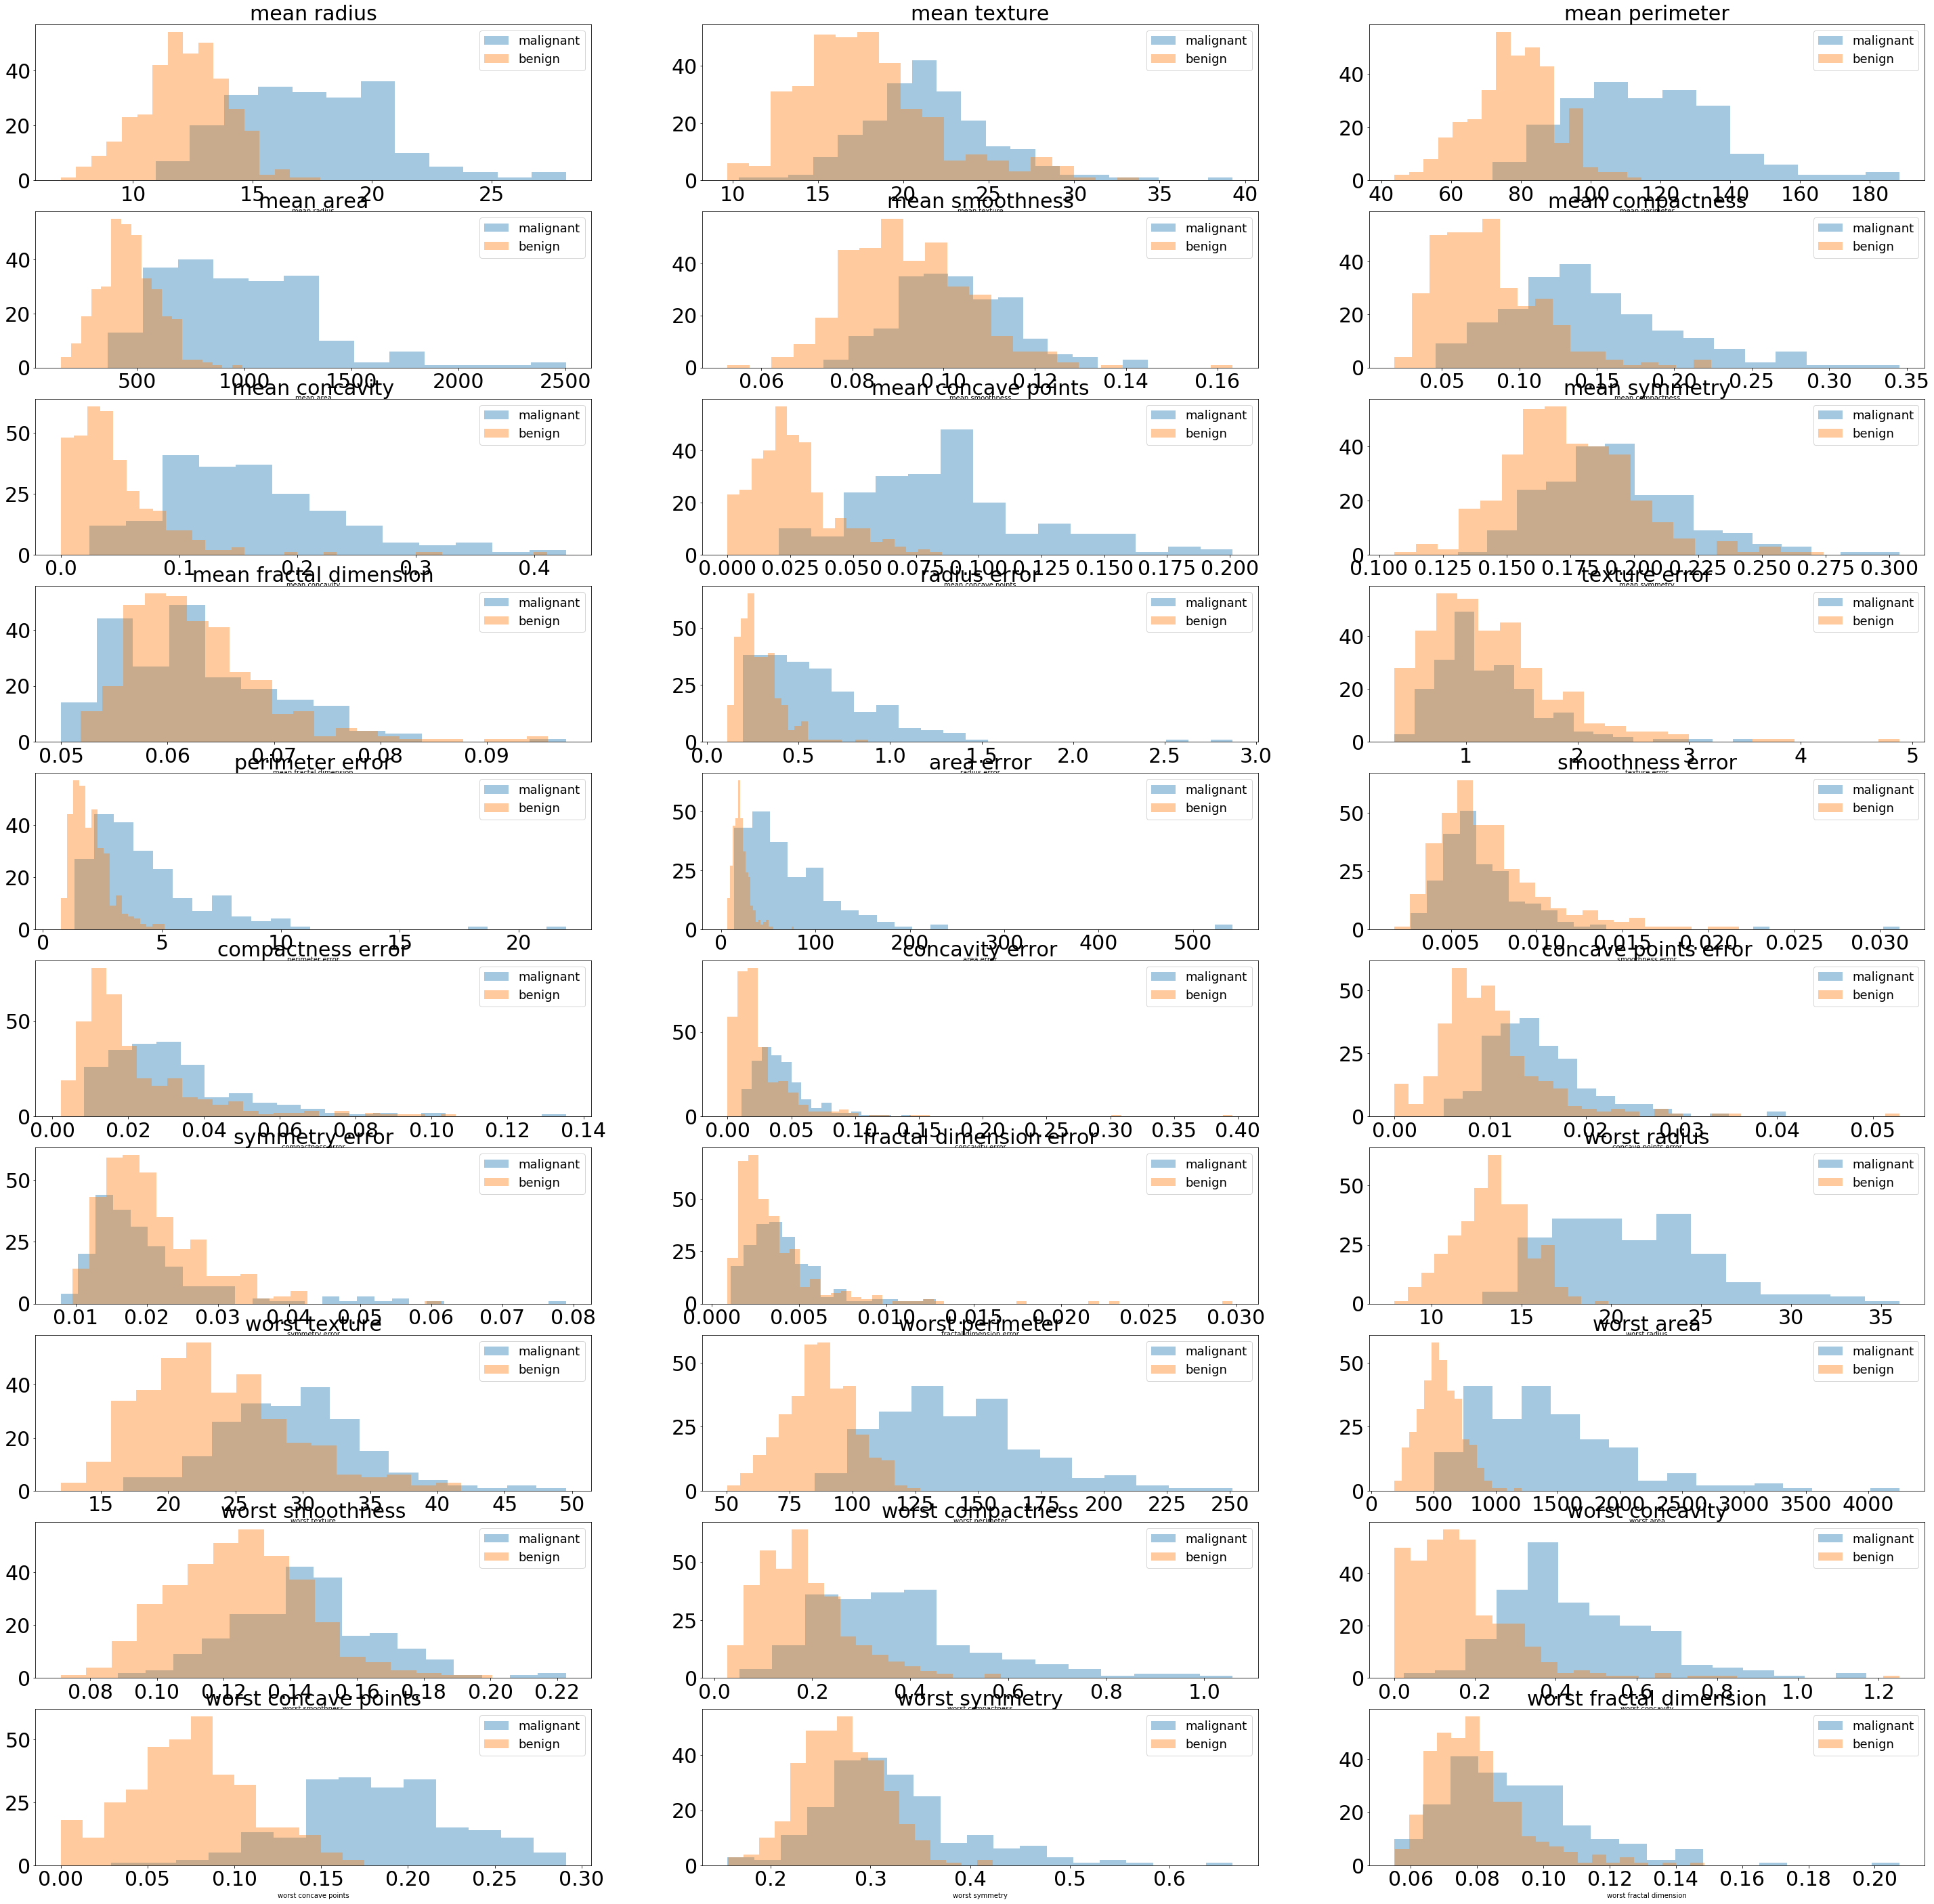

In [55]:
# 各説明変数の悪性、良性の関係をヒストグラムで表示

row, col = 3, 10
i = 0
plt.figure(figsize = (50,50))
for element in cancer.feature_names:
    plt.subplot(col,row,i+1)
    sns.distplot(df[df['tumor'] == 0][element],kde=False,label='malignant')
    sns.distplot(df[df['tumor'] == 1][element],kde=False,label='benign')
    plt.legend()
    
    plt.title(element, fontsize=30)
    plt.legend(fontsize=18)
    plt.tick_params(labelsize=30)
    
    i += 1

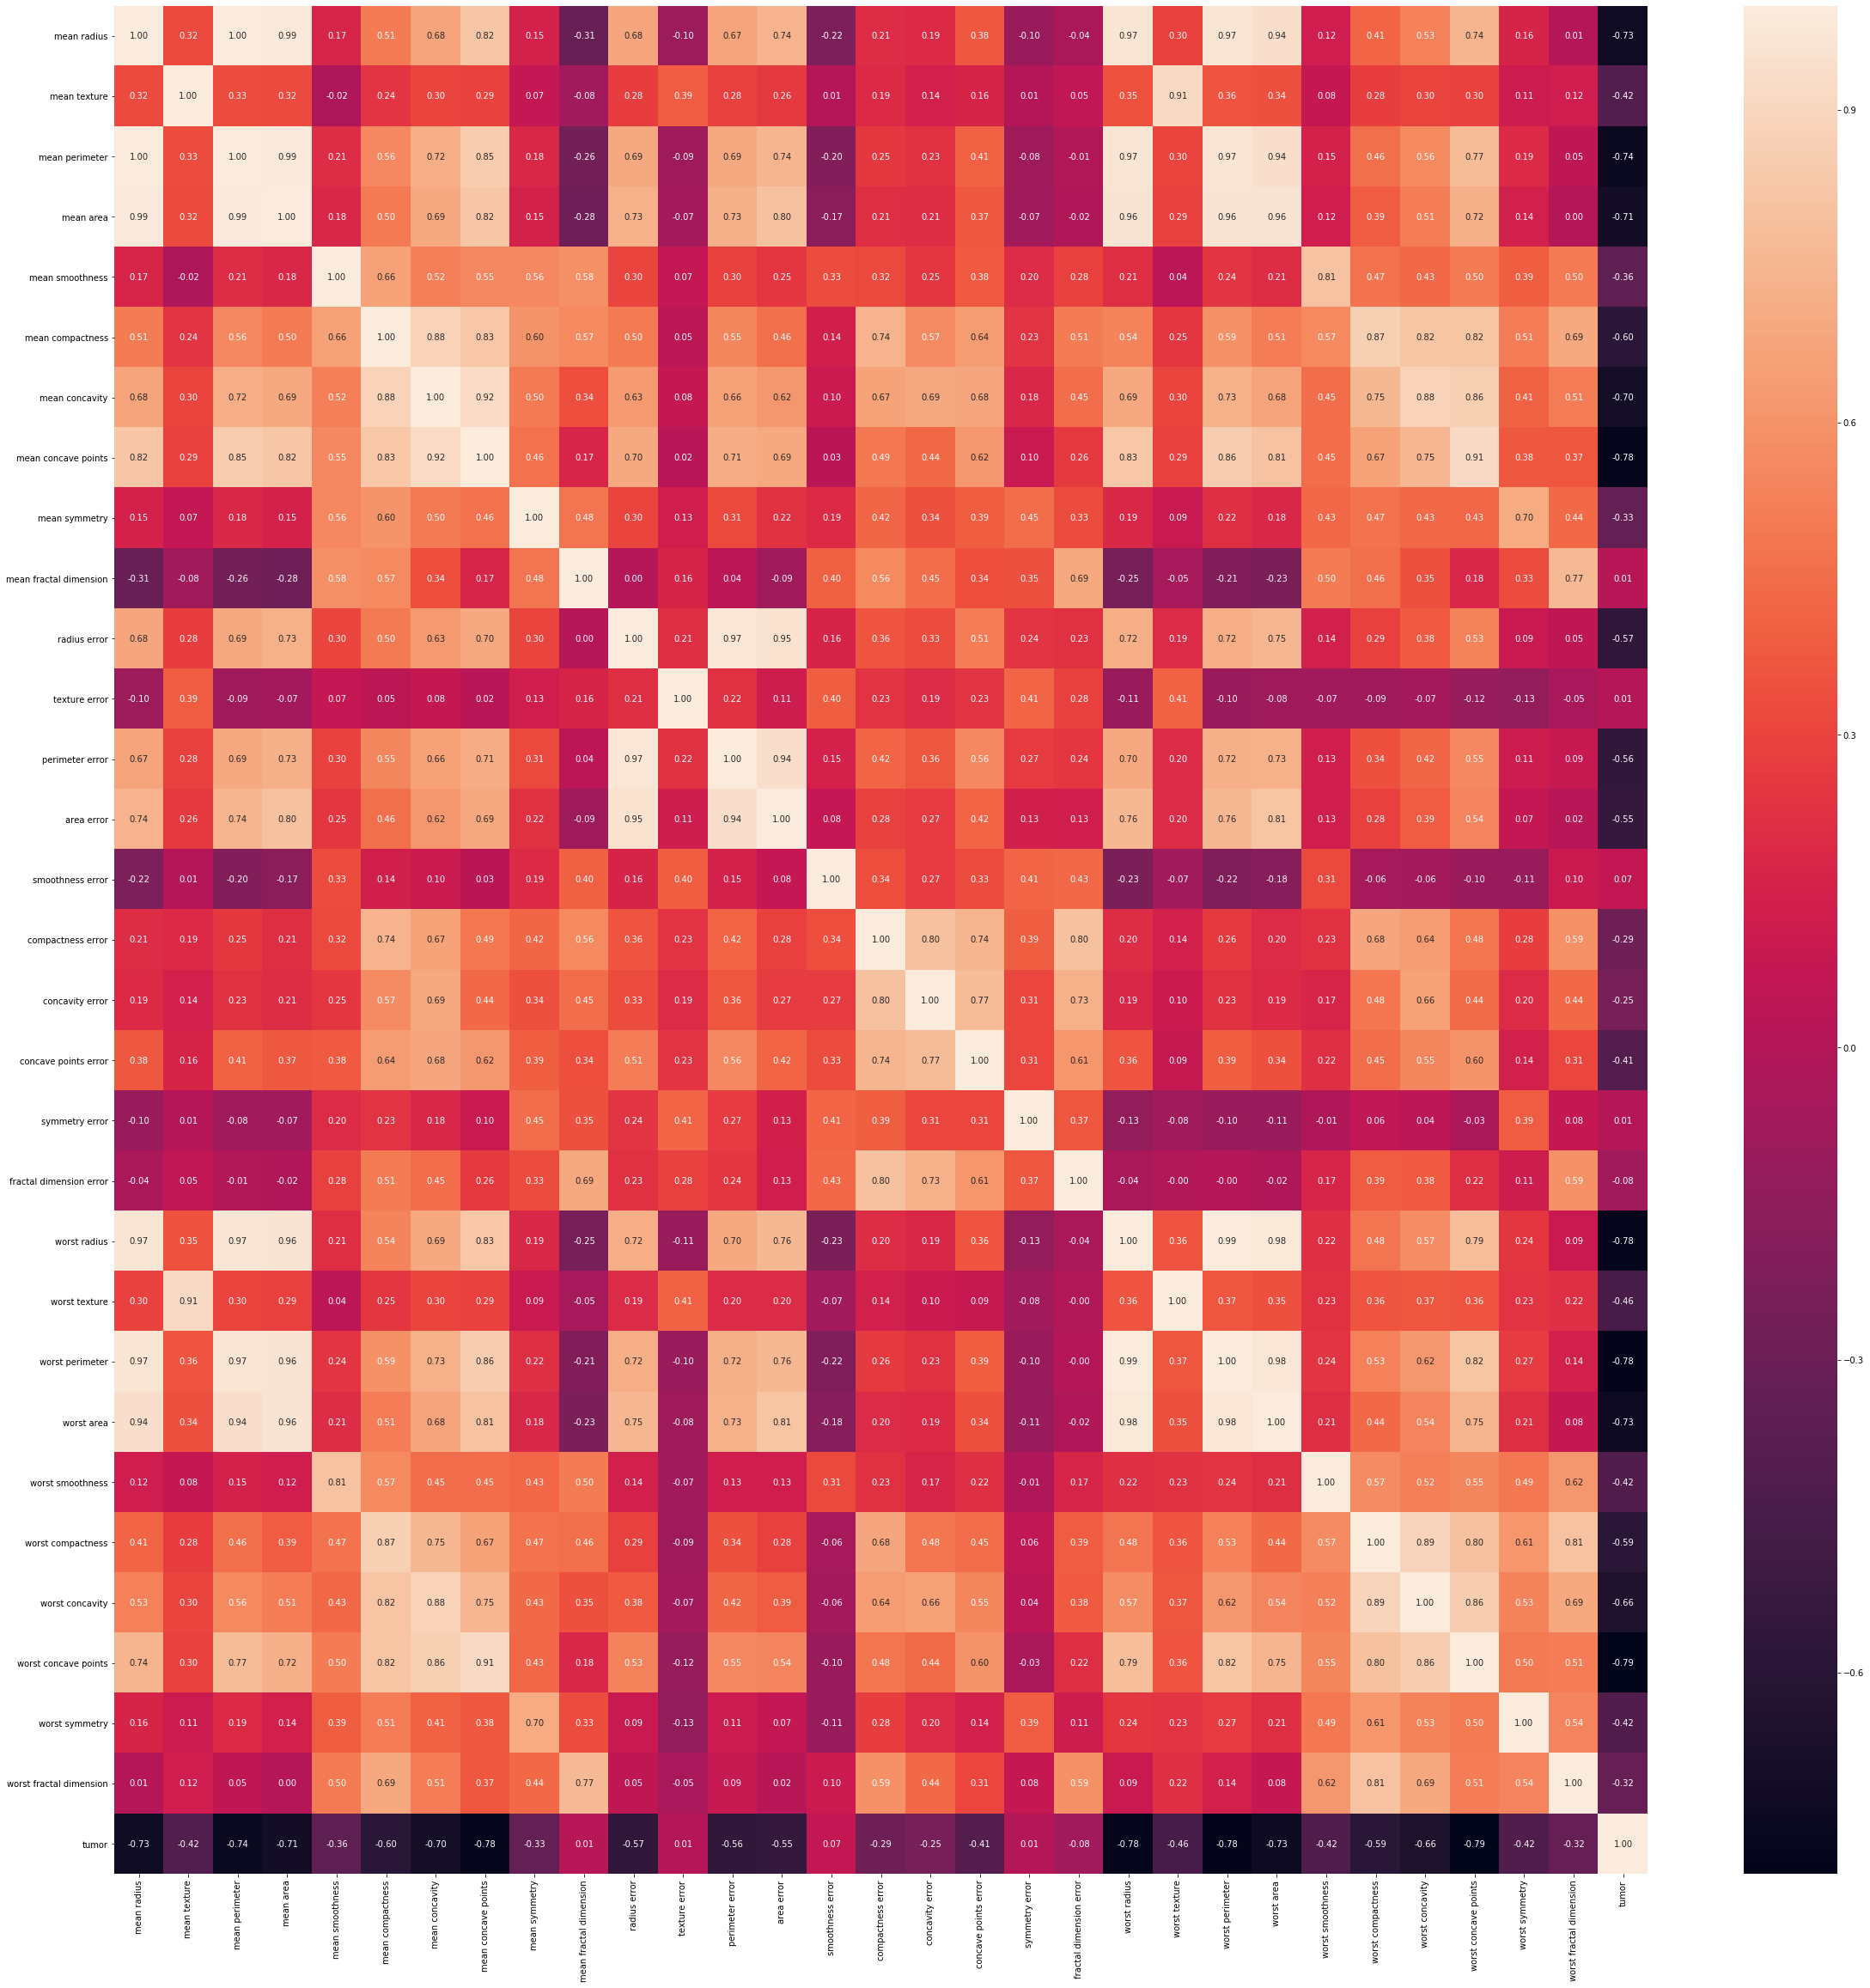

In [56]:
# ヒートマップを表示

plt.figure(figsize = (40,40))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

# 分かったこと
- 単純に腫瘍の大きさが大きいと悪性である可能性が高い
- 腫瘍の凹凸が多いと悪性である可能性が高い
- 滑らかな形をした腫瘍であっても、楕円形だと悪性である可能性が高い
- 半径と周の長さ、面積は相関が強いので、3の説明変数をつを一つにまとめた新たな説明変数を作っていいかも
- 上記以外にも相関の強いものはまとめてみる

# 評価指標

今回は悪性を良性と判断してしまうミスをなくすことに重きを置くべきである

- 正答率
- 再現率 

この2つを採用していきたいと思う

# 評価プロトコル
- ホールドアウト
- StratifiedKFold

この2つを使おうと思う

# 学習モデルの訓練

In [90]:
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.13 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 ,
       13.44 , 10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 13.17 ,
       12.05 , 13.49 , 11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 ,
       19.21 , 14.71 , 13.05 ,  8.618, 10.17 ,  8.598, 14.25 ,  9.173,
       12.68 , 14.78 ,  9.465, 11.31 ,  9.029, 12.78 , 18.94 ,  8.888,
       17.2  , 13.8  , 12.31 , 16.07 , 13.53 , 18.05 , 20.18 , 12.86 ,
       11.45 , 13.34 , 25.22 , 19.1  , 12.   , 18.46 , 14.48 , 19.02 ,
       12.36 , 14.64 , 14.62 , 15.37 , 13.27 , 13.45 , 15.06 , 20.26 ,
       12.18 ,  9.787, 11.6  , 14.42 , 13.61 ,  6.981, 12.18 ,  9.876,
       10.49 , 13.11 , 11.64 , 12.36 , 22.27 , 11.34 ,  9.777, 12.63 ,
      

## ロジスティック回帰

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score


# ホールドアウト
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
y1_pred = logreg1.predict(X_test)

print('ホールドアウト:\n')
print(f'Acc: {logreg1.score(X_test, y_test):.3f}')
print(f'Recall: {recall_score(y_test, y1_pred)}')

# StratifiedKFold
print('\nStratifiedKFold:\n')

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logreg2 = LogisticRegression()
    logreg2.fit(X_train, y_train)
    y2_pred = logreg2.predict(X_test)
    print(f'Acc: {logreg2.score(X_test, y_test):.3f}')
    print(f'Recall: {recall_score(y_test, y2_pred)}\n')

ホールドアウト:

Acc: 0.938
Recall: 0.9577464788732394

StratifiedKFold:

Acc: 0.974
Recall: 0.9722222222222222

Acc: 0.948
Recall: 0.9861111111111112

Acc: 0.947
Recall: 0.9859154929577465

Acc: 0.938
Recall: 0.9577464788732394

Acc: 0.938
Recall: 0.9577464788732394



## サポートベクターマシン

In [242]:
from sklearn.svm import SVC

# ホールドアウト
svc1 = SVC()
svc1.fit(X_train, y_train)
y1_pred = svc1.predict(X_test)
print('ホールドアウト:\n')
print(f'Acc: {svc1.score(X_test, y_test):.3f}')
print(f'Recall: {recall_score(y_test, y1_pred)}')

# StratifiedKFold
print('\nStratifiedKFold:\n')
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc2 = SVC()
    svc2.fit(X_train, y_train)
    y2_pred = svc2.predict(X_test)
    print(f'Acc: {svc2.score(X_test, y_test):.3f}')
    print(f'Recall: {recall_score(y_test, y2_pred)}\n')

ホールドアウト:

Acc: 0.628
Recall: 1.0

StratifiedKFold:

Acc: 0.626
Recall: 1.0

Acc: 0.626
Recall: 1.0

Acc: 0.628
Recall: 1.0

Acc: 0.628
Recall: 1.0

Acc: 0.628
Recall: 1.0



# 分かったこと
- svcは精度は低いが、再現率がとても高い。ハイパーパラメータのチューニングをちゃんとすればもっと制度は高くなりそう

# 機械モデルの改善

## 新たな説明変数の追加


In [210]:
# radiusとperimeterとareaをまとめた説明変数radius_familyを作成
# 平均を取ると面積や周の長さに依存してしまうので、それぞれ標準化してから平均を取る

from sklearn.preprocessing import StandardScaler


df = pd.DataFrame(cancer.data, columns=[element for element in cancer.feature_names])

scaler  = StandardScaler()

radius_std = []
perimeter_std = []
area_std = []

for i in range(len(df['mean radius'])):
    radius_std.append(list([df['mean radius'][i]]))
    perimeter_std.append(list([df['mean perimeter'][i]]))
    area_std.append(list([df['mean area'][i]]))

scaler.fit(radius_std)
radius_std = scaler.transform(radius_std)
radius_std = list(map(float, radius_std))

scaler.fit(perimeter_std)
perimeter_std = scaler.transform(perimeter_std)
perimeter_std = list(map(float, perimeter_std))

scaler.fit(area_std)
area_std = scaler.transform(area_std)
area_std = list(map(float, area_std))

df['mean_radius_family'] = [radius_std[i] + perimeter_std[i] + area_std[i] for i in range(len(radius_std))]
del(df['mean radius'])
del(df['mean perimeter'])
del(df['mean area'])

df

,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,mean_radius_family
0,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,3.351373
1,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,5.424484
2,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,4.705275
3,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,-2.126060
4,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,5.353099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,6.515636
565,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,5.044627
566,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.952913
567,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,5.556083


## ロジスティック回帰

In [243]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# ホールドアウト
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
y1_pred = logreg1.predict(X_test)

print('ホールドアウト:\n')
print(f'Acc: {logreg1.score(X_test, y_test):.3f}')
print(f'Recall: {recall_score(y_test, y1_pred)}')

# StratifiedKFold
print('\nStratifiedKFold:\n')

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logreg2 = LogisticRegression()
    logreg2.fit(X_train, y_train)
    y2_pred = logreg2.predict(X_test)
    print(f'Acc: {logreg2.score(X_test, y_test):.3f}')
    print(f'Recall: {recall_score(y_test, y2_pred)}\n')

ホールドアウト:

Acc: 0.956
Recall: 0.9402985074626866

StratifiedKFold:

Acc: 0.974
Recall: 0.9722222222222222

Acc: 0.948
Recall: 0.9861111111111112

Acc: 0.947
Recall: 0.9859154929577465

Acc: 0.938
Recall: 0.9577464788732394

Acc: 0.938
Recall: 0.9577464788732394



## サポートベクターマシン

In [244]:
# ホールドアウト
svc1 = SVC()
svc1.fit(X_train, y_train)
y1_pred = svc1.predict(X_test)
print('ホールドアウト:\n')
print(f'Acc: {svc1.score(X_test, y_test):.3f}')
print(f'Recall: {recall_score(y_test, y1_pred)}')

# StratifiedKFold
print('\nStratifiedKFold:\n')
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc2 = SVC()
    svc2.fit(X_train, y_train)
    y2_pred = svc2.predict(X_test)
    print(f'Acc: {svc2.score(X_test, y_test):.3f}')
    print(f'Recall: {recall_score(y_test, y2_pred)}\n')

ホールドアウト:

Acc: 0.628
Recall: 1.0

StratifiedKFold:

Acc: 0.626
Recall: 1.0

Acc: 0.626
Recall: 1.0

Acc: 0.628
Recall: 1.0

Acc: 0.628
Recall: 1.0

Acc: 0.628
Recall: 1.0



# ハイパーパラメータのチューニング

## ロジスティック回帰

In [284]:
from sklearn.model_selection import ParameterGrid

# ホールドアウト
svm_param_grid = [10**i for i in range(-3, 3)]

max_score = 0
max_C = 0
max_recall = 0

print('ホールドアウト')
for params in svm_param_grid:
    
    clf = LogisticRegression(C = params)

    clf.fit(X_train, y_train)
        
    if max_score < clf.score(X_test, y_test):
        max_score = clf.score(X_test, y_test)
        max_C = params
        y1_pred = clf.predict(X_test)
        max_recall = recall_score(y_test, y1_pred)
    
print(f'Acc: {max_score}, Recall: {max_recall}, C: {max_C}')


# StratifiedKFold
print('\nStratifiedKFold')

max_score = 0
max_C = 0
max_recall = 0

for param in svm_param_grid:
    valid_scores = []
    for train_index, valid_index in skf.split(X, y):
        X_train = X[train_index]
        X_test = X[valid_index]
        
        y_train = y[train_index]
        y_test = y[valid_index]
        clf = LogisticRegression(C = param)
        
        clf.fit(X_train, y_train)
        
        valid_score = clf.score(X_test, y_test)
        valid_scores.append(valid_score)
        
    if max_score < np.mean(valid_scores):
        max_score = np.mean(valid_scores)
        max_C = param
        y2_pred = clf.predict(X_test)
        max_recall = recall_score(y_test, y2_pred)
    
print(f'Acc: {max_score}, Recall: {max_recall}, C: {max_C}')

ホールドアウト
Acc: 0.9557522123893806, Recall: 0.971830985915493, C: 100

StratifiedKFold
Acc: 0.9595690650250097, Recall: 0.971830985915493, C: 100


## サポートベクターマシン

In [287]:
# ホールドアウト
svm_param_grid2 = {
    'C': [10**i for i in range(-3, 3)],
    'gamma': [10**i for i in range(-3, 3)]
}

max_score = 0
max_C = 0
max_gamma = 0
max_recall = 0

print('ホールドアウト')
for params in ParameterGrid(svm_param_grid2):
    
    clf = SVC(**params)

    clf.fit(X_train, y_train)
        
    if max_score < clf.score(X_test, y_test):
        max_score = clf.score(X_test, y_test)
        max_C = params['C']
        max_gamma = params['gamma']
        y1_pred = clf.predict(X_test)
        max_recall = recall_score(y_test, y1_pred)
    
print(f'Acc: {max_score}, Recall: {max_recall}, C: {max_C}, gamma: {max_gamma}')

# StratifiedKFold
print('\nStratifiedKFold')

max_score = 0
max_C = 0
max_gamma = 0
max_recall = 0

for params in ParameterGrid(svm_param_grid2):
    valid_scores = []
    for train_index, valid_index in skf.split(X, y):
        X_train = X[train_index]
        X_test = X[valid_index]
        
        y_train = y[train_index]
        y_test = y[valid_index]
        
        clf = SVC(**params)
        
        clf.fit(X_train, y_train)
        
        valid_score = clf.score(X_test, y_test)
        valid_scores.append(valid_score)
        
    if max_score < np.mean(valid_scores):
        max_score = np.mean(valid_scores)
        max_C = params['C']
        max_gamma = params['gamma']
        y2_pred = clf.predict(X_test)
        max_recall = recall_score(y_test, y2_pred)
    
print(f'Acc: {max_score}, Recall: {max_recall}, C: {max_C}, gamma: {max_gamma}')

ホールドアウト
Acc: 0.8938053097345132, Recall: 0.8873239436619719, C: 1, gamma: 0.001

StratifiedKFold
Acc: 0.9173374374759524, Recall: 0.8873239436619719, C: 1, gamma: 0.001


# 分かったこと
- 説明変数の変更の方法がよくなかったので、あまり結果は変わらなかった。
- やはりサポートベクターマシンはパラメータのチューニングで性能がかなり変わった。

おわり